In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_overfit import overfit_example, output
from lab_utils_common import sigmoid

# Cost function with Regularization

## Regularized Linear Regression

In [10]:
def compute_cost_linear_reg(x, y, w, b, lambda_ = 1):
    """
    Args: 
        x: (m, n)
        y: (m, )
        w: (n, )
        b: scalar
    return
        total_cost
    """
    n_samples = x.shape[0]
    f = np.dot(x, w) + b
    mean_square_error = np.sum((f-y)**2)/(2*n_samples)
    
    regularization_term = (lambda_/(2 * n_samples)) * np.sum(w**2)
    
    total_cost = mean_square_error + regularization_term
    return total_cost

In [11]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


## Regularized Logistic Regression

In [12]:
def compute_cost_logistic_reg(x, y, w, b, lambda_=1):
    
    n_samples = x.shape[0]
    
    f = sigmoid(np.dot(x, w) + b)
    log_cost = (- np.dot(y, np.log(f)) - np.dot((1-y), np.log(1-f)))/n_samples
    
    regularization_term = (lambda_/(2 * n_samples)) * np.sum(w**2)
    
    total_cost = log_cost + regularization_term
    
    return total_cost

In [13]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741671


# Gradient Descent with Regularization

## Gradient function for regularized linear regression

In [24]:
def compute_gradient_linear_reg(x, y, w, b, lambda_):
    n_samples = x.shape[0]
    f = np.dot(x, w) + b
    error = (f - y)
    dw = np.dot(error, x)/n_samples
    dw_re = dw + (lambda_/n_samples) * w
    
    db = np.sum(error)/n_samples
    
    return dw_re, db

In [25]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_dw_tmp, dj_db_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.2164587753586586]


## Gradient function for regularized logistic regression

In [26]:
def compute_gradient_logistic_reg(x, y, w, b, lambda_):
    n_samples = x.shape[0]
    f = sigmoid(np.dot(x, w) + b)
    error = (f - y)
    dw = np.dot(error, x)/n_samples
    dw_re = dw + (lambda_/n_samples) * w
    
    db = np.sum(error)/n_samples
    
    return dw_re, db

In [27]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_dw_tmp, dj_db_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


# Run over-fitting example

Output()

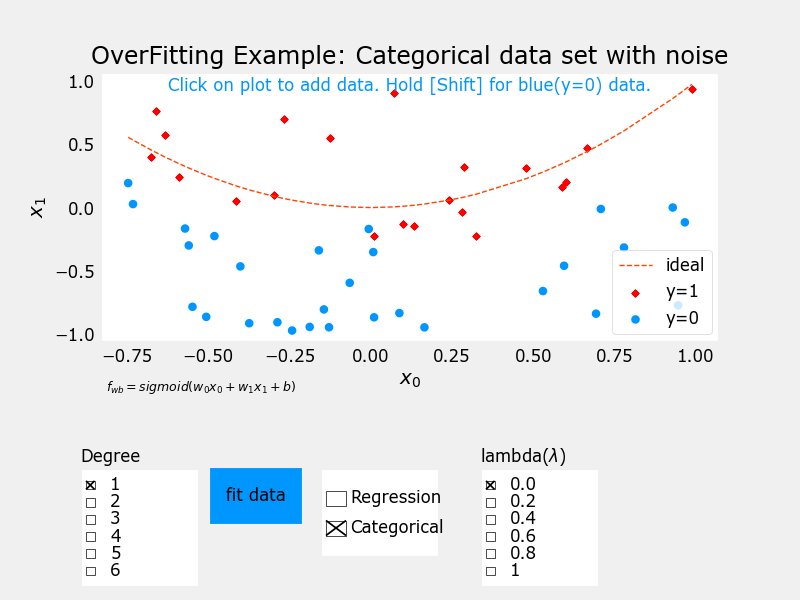

In [28]:
plt.close('all')
display(output)
ofit = overfit_example(True)